In [1]:
!pip install scikit-plot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


Defaulting to user installation because normal site-packages is not writeable


In [2]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall

In [3]:
train = pd.read_csv('C:/Users/Amir Hassan/Desktop/Python/train.csv', skipinitialspace=True) 
test = pd.read_csv('C:/Users/Amir Hassan/Desktop/Python/test.csv', skipinitialspace=True) 

In [4]:
# # 1. max utf string (to roughly find language)
# # Function to calculate max UTF-8 value for a string
# max_ord_utf = lambda s: max(ord(char) for char in s)

# # Apply the function to create new columns
# train['name_max_ordUTF'] = train['name'].apply(max_ord_utf).astype(float)
# # df1['artists_max_ordUTF'] = df1['artists'].apply(max_ord_utf).astype(float)
# # df1['album_max_ordUTF'] = df1['album_name'].apply(max_ord_utf).astype(float)

# # Apply the function to create new columns
# test['name_max_ordUTF'] = test['name'].apply(max_ord_utf).astype(float)
# # df2['artists_max_ordUTF'] = df2['artists'].apply(max_ord_utf).astype(float)
# # df2['album_max_ordUTF'] = df2['album_name'].apply(max_ord_utf).astype(float)

In [5]:
# For X_train
X_train = train[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'processing','n_beats','n_bars']]
y_train = train['genre']  # Replace 'target_column_name' with the actual target column

# For X_test
X_test = test[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'processing','n_beats','n_bars']]
y_test = test['genre']  # Replace 'target_column_name' with the actual target column


In [6]:
### NORMALIZATION  *********

In [7]:
# from sklearn.preprocessing import StandardScaler

In [8]:
# norm = StandardScaler()
# norm.fit(X_train)

# X_train_norm = norm.transform(X_train)
# X_test_norm = norm.transform(X_test)

In [9]:
### KNN           ************           K-Nearest Neighbor Aloforithm to find the nearest algorithm

In [10]:
# from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score

# # Assuming X and y are your features and target labels
# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

# # Initialize KNN classifier
# knn = KNeighborsClassifier(n_neighbors=5)

# # Train the classifier on the training data
# knn.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = knn.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy KNN:", accuracy)


In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [12]:
clf = KNeighborsClassifier(n_neighbors=10, metric="euclidean", weights="uniform")
clf.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [13]:
# predict: Predict the class labels for the provided data.
y_test_pred = clf.predict(X_test)
y_test_pred

array(['forro', 'happy', 'study', ..., 'brazil', 'brazil', 'idm'],
      dtype=object)

In [14]:
y_test

0        industrial
1         breakbeat
2            indian
3            j-idol
4         breakbeat
           ...     
4995         disney
4996        iranian
4997     industrial
4998    black-metal
4999     industrial
Name: genre, Length: 5000, dtype: object

In [15]:
y_train

0            j-dance
1            iranian
2        black-metal
3          bluegrass
4              happy
            ...     
14995            idm
14996          sleep
14997         techno
14998      breakbeat
14999         indian
Name: genre, Length: 15000, dtype: object

In [16]:
print("Accuracy KNN:", accuracy_score(y_test_pred, y_test))

Accuracy KNN: 0.2148


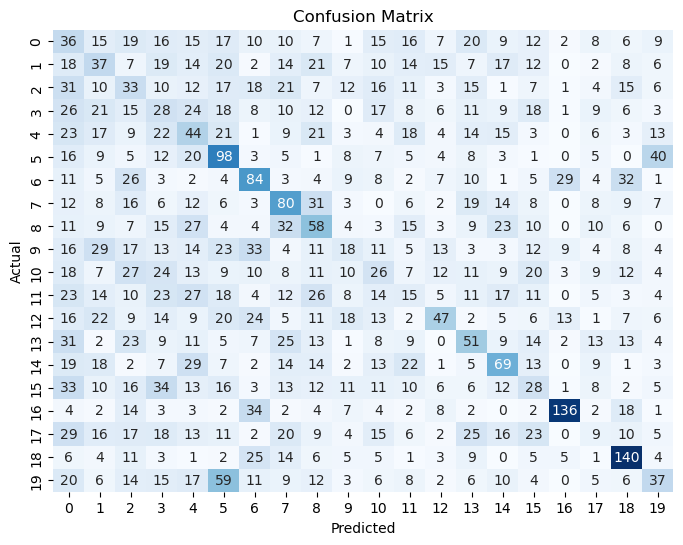

In [78]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [79]:
# score: Return the mean accuracy on the given test data and labels.
clf.score(X_test, y_test)

0.2148

In [80]:
# KNeighborsClassifier.score is doing this
(y_test_pred == y_test).sum() / len(y_test)

0.2148

In [81]:
### Performance Evolution

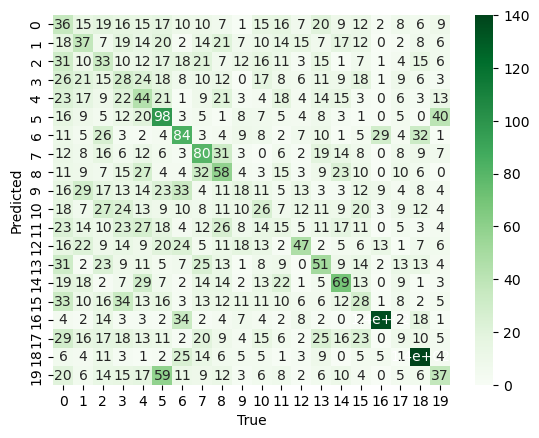

In [82]:
cf = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cf, annot=True, cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

In [83]:
# Return probability estimates for the test data X.
y_test_pred_proba = clf.predict_proba(X_test)
y_test_pred_proba[0:10]

array([[0.1, 0.1, 0.1, 0. , 0.1, 0.1, 0. , 0.2, 0. , 0. , 0. , 0.2, 0. ,
        0. , 0. , 0. , 0. , 0.1, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0.4, 0.2, 0. , 0.2, 0. ,
        0. , 0.1, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.1, 0. , 0. , 0.1, 0. , 0.1, 0. , 0. , 0. , 0. , 0.1, 0. ,
        0.1, 0. , 0. , 0. , 0. , 0.5, 0. ],
       [0. , 0. , 0. , 0. , 0.1, 0.1, 0. , 0.1, 0. , 0. , 0. , 0. , 0.1,
        0. , 0.6, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.3, 0. , 0.2, 0. , 0.1, 0. , 0.1, 0.1, 0. , 0. , 0. ,
        0. , 0. , 0.2, 0. , 0. , 0. , 0. ],
       [0.1, 0. , 0. , 0. , 0. , 0.3, 0.1, 0. , 0. , 0. , 0.1, 0. , 0. ,
        0.1, 0. , 0.2, 0. , 0.1, 0. , 0. ],
       [0.1, 0. , 0. , 0. , 0. , 0. , 0.8, 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0.1, 0. , 0. , 0. ],
       [0. , 0.1, 0. , 0.1, 0. , 0. , 0. , 0. , 0.4, 0.2, 0.1, 0.1, 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.2, 0.1, 0. , 0.1, 0. , 0.1, 0. , 0. , 0

In [84]:
y_test_pred[0:10]

array(['forro', 'happy', 'study', 'j-idol', 'bluegrass', 'chicago-house',
       'disney', 'happy', 'mandopop', 'brazil'], dtype=object)

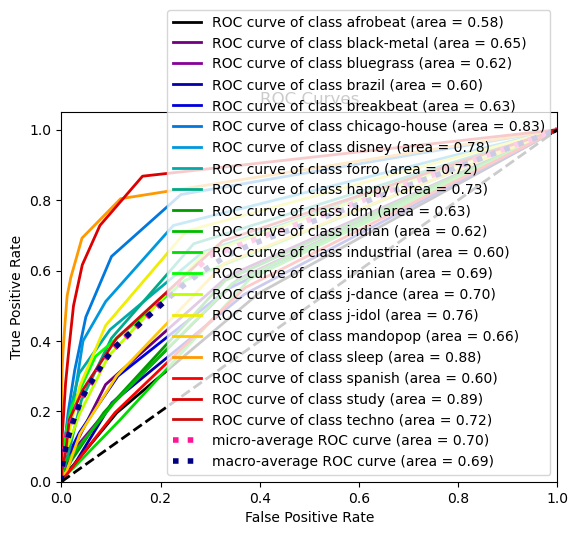

In [85]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
plot_roc(y_test, y_test_pred_proba)
plt.show()

In [86]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
roc_auc_score(y_test, y_test_pred_proba, multi_class="ovr", average="macro")

0.6939388842105262

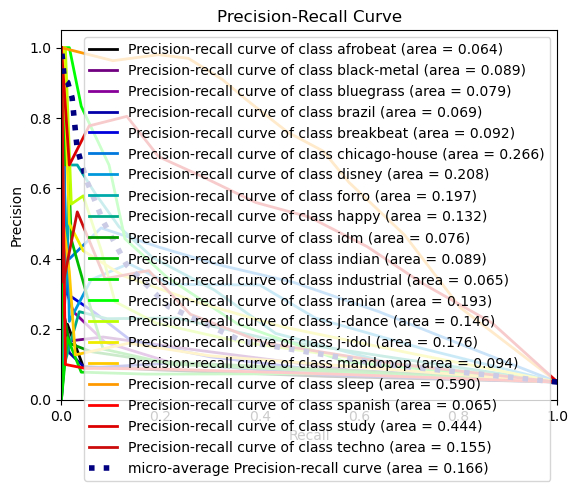

In [87]:
plot_precision_recall(y_test, y_test_pred_proba)
plt.show()

In [88]:
#### Cross-validation
# https://scikit-learn.org/stable/modules/cross_validation.html

In [89]:
from sklearn.model_selection import cross_val_score
k = 2

In [90]:
# initialize classifier
clf = KNeighborsClassifier(n_neighbors=5, metric="euclidean", weights="uniform")

scores = cross_val_score(clf, X_train, y_train, cv=k)
scores

array([0.1856, 0.1816])

In [91]:
print("Overall error estimate:", 1 - scores.mean())

Overall error estimate: 0.8164


In [92]:
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std()))

Accuracy: 0.1836 (+/- 0.00)


In [93]:
# scoring default is accuracy
cross_val_score(clf, X_train, y_train, cv=k, scoring='f1_macro')

array([0.18623646, 0.18299543])

In [94]:
### Hyperparameters Tuning

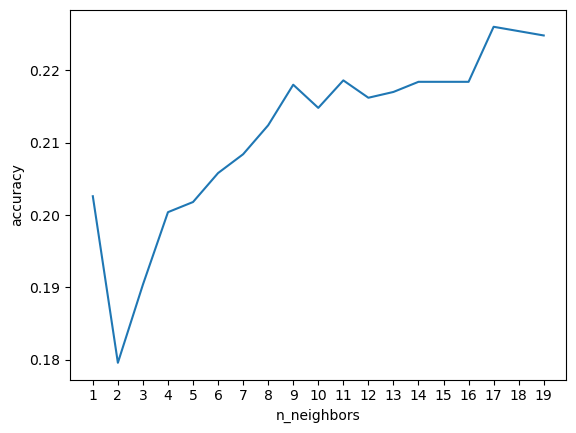

In [95]:
n_neighbors = range(1,20)
scores = list()

for n in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=n, metric="euclidean", weights="uniform")
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

plt.plot(scores)
plt.xticks(range(len(n_neighbors)), n_neighbors)
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.show()

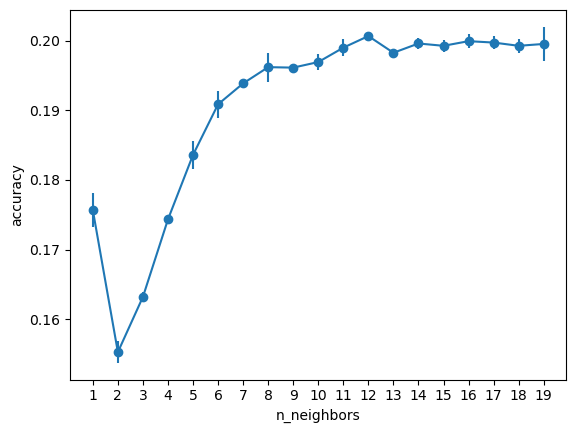

In [96]:
n_neighbors = range(1,20)
avg_scores = list()
std_scores = list()

for n in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=n, metric="euclidean", weights="uniform")
    scores = cross_val_score(clf, X_train, y_train, cv=k)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

#plt.plot(avg_scores)
plt.errorbar(range(len(n_neighbors)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(n_neighbors)), n_neighbors)
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.show()

In [97]:
clf = KNeighborsClassifier(n_neighbors=12, metric="euclidean", weights="uniform")
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_test_pred))

Accuracy: 0.2162


In [98]:
#### Grid Search

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
%%time
param_grid = {
    "n_neighbors": np.arange(1, X_train.shape[0]//2),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "cityblock"],
}

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=param_grid,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    refit=True,
    # verbose=2
)

grid.fit(X_train, y_train)
clf = grid.best_estimator_

In [ ]:
print(grid.best_params_, grid.best_score_)

In [24]:
y_test_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_test_pred))

Accuracy: 0.3674


In [25]:
clf.score(X_test, y_test)

0.3674

In [ ]:
### Naive Bayes

In [17]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB

In [18]:
#### Gaussian

In [19]:
clf = GaussianNB()

In [20]:
%%time
clf.fit(X_train, y_train)

CPU times: total: 46.9 ms
Wall time: 57.3 ms


GaussianNB()

In [21]:
y_pred = clf.predict(X_test)
y_pred

array(['j-idol', 'idm', 'j-dance', ..., 'j-idol', 'black-metal', 'happy'],
      dtype='<U13')

In [22]:
y_test

0        industrial
1         breakbeat
2            indian
3            j-idol
4         breakbeat
           ...     
4995         disney
4996        iranian
4997     industrial
4998    black-metal
4999     industrial
Name: genre, Length: 5000, dtype: object

In [23]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy:", accuracy)


Naive Bayes Accuracy: 0.3674


In [36]:
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

     afrobeat       0.43      0.05      0.09       250
  black-metal       0.51      0.62      0.56       250
    bluegrass       0.46      0.16      0.24       250
       brazil       0.30      0.13      0.18       250
    breakbeat       0.27      0.08      0.13       250
chicago-house       0.39      0.65      0.49       250
       disney       0.38      0.34      0.36       250
        forro       0.31      0.67      0.42       250
        happy       0.34      0.34      0.34       250
          idm       0.44      0.18      0.26       250
       indian       0.38      0.01      0.02       250
   industrial       0.26      0.22      0.24       250
      iranian       0.40      0.18      0.25       250
      j-dance       0.32      0.64      0.42       250
       j-idol       0.28      0.59      0.38       250
     mandopop       0.27      0.74      0.40       250
        sleep       0.54      0.75      0.63       250
      spa

In [37]:
clf.predict_proba(X_test)

array([[4.96085819e-03, 1.14370206e-03, 3.27729565e-04, ...,
        6.53899462e-02, 1.80480852e-08, 1.05071268e-03],
       [6.40693141e-03, 1.09313643e-01, 1.18803506e-03, ...,
        4.67011909e-17, 8.64270613e-19, 1.58601069e-01],
       [1.77655359e-02, 4.58229300e-03, 6.52471576e-03, ...,
        1.50708890e-01, 1.14797828e-03, 7.31301036e-03],
       ...,
       [3.04016265e-03, 2.25395834e-06, 1.00428534e-03, ...,
        2.38454029e-02, 5.17197184e-12, 2.27508770e-03],
       [6.51477887e-04, 9.06543016e-01, 3.69825392e-06, ...,
        5.69960220e-03, 9.24258797e-14, 6.73184289e-05],
       [8.49715835e-04, 2.30624415e-02, 1.22947866e-06, ...,
        1.80229820e-08, 4.16307747e-16, 1.94788082e-03]])

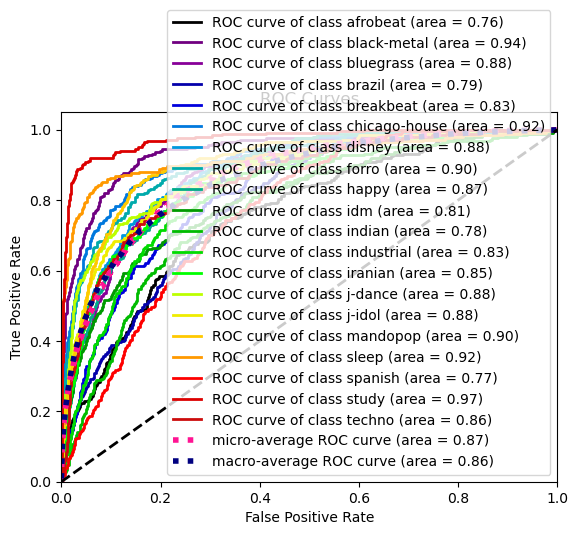

0.861453852631579


In [38]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
plot_roc(y_test, clf.predict_proba(X_test))
plt.show()
print(roc_auc_score(y_test, clf.predict_proba(X_test), multi_class="ovr", average="macro"))